In [8]:
import numpy as np
import graphviz as gz
import matplotlib.pyplot as plt
import math
import random
import torch

%matplotlib inline

# Makemore

Train a datamodel to make more of the input, in this case it will be names using Bigrams language model

In [9]:
with open('names.txt', 'r') as f:
    names = f.readlines()
names = ['.' + n[:-1]  + '.' for n in names]

In [10]:
print(f"Length min: {min(len(w) for w in names)} max: {max(len(w) for w in names)})")

alphabet = set()
for n in names:
    alphabet = alphabet.union(n)
alphabet = sorted(list(alphabet))
print(alphabet)

Length min: 4 max: 17)
['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [11]:
bigrams = {}
for w in names:
    for b in zip(w, w[1:]):
        bigrams[b] = bigrams.get(b, 0) + 1
bigrams = sorted(bigrams.items(), key=lambda x: x[1], reverse=True)
bigrams[:10]

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963)]

(-0.5, 26.5, 26.5, -0.5)

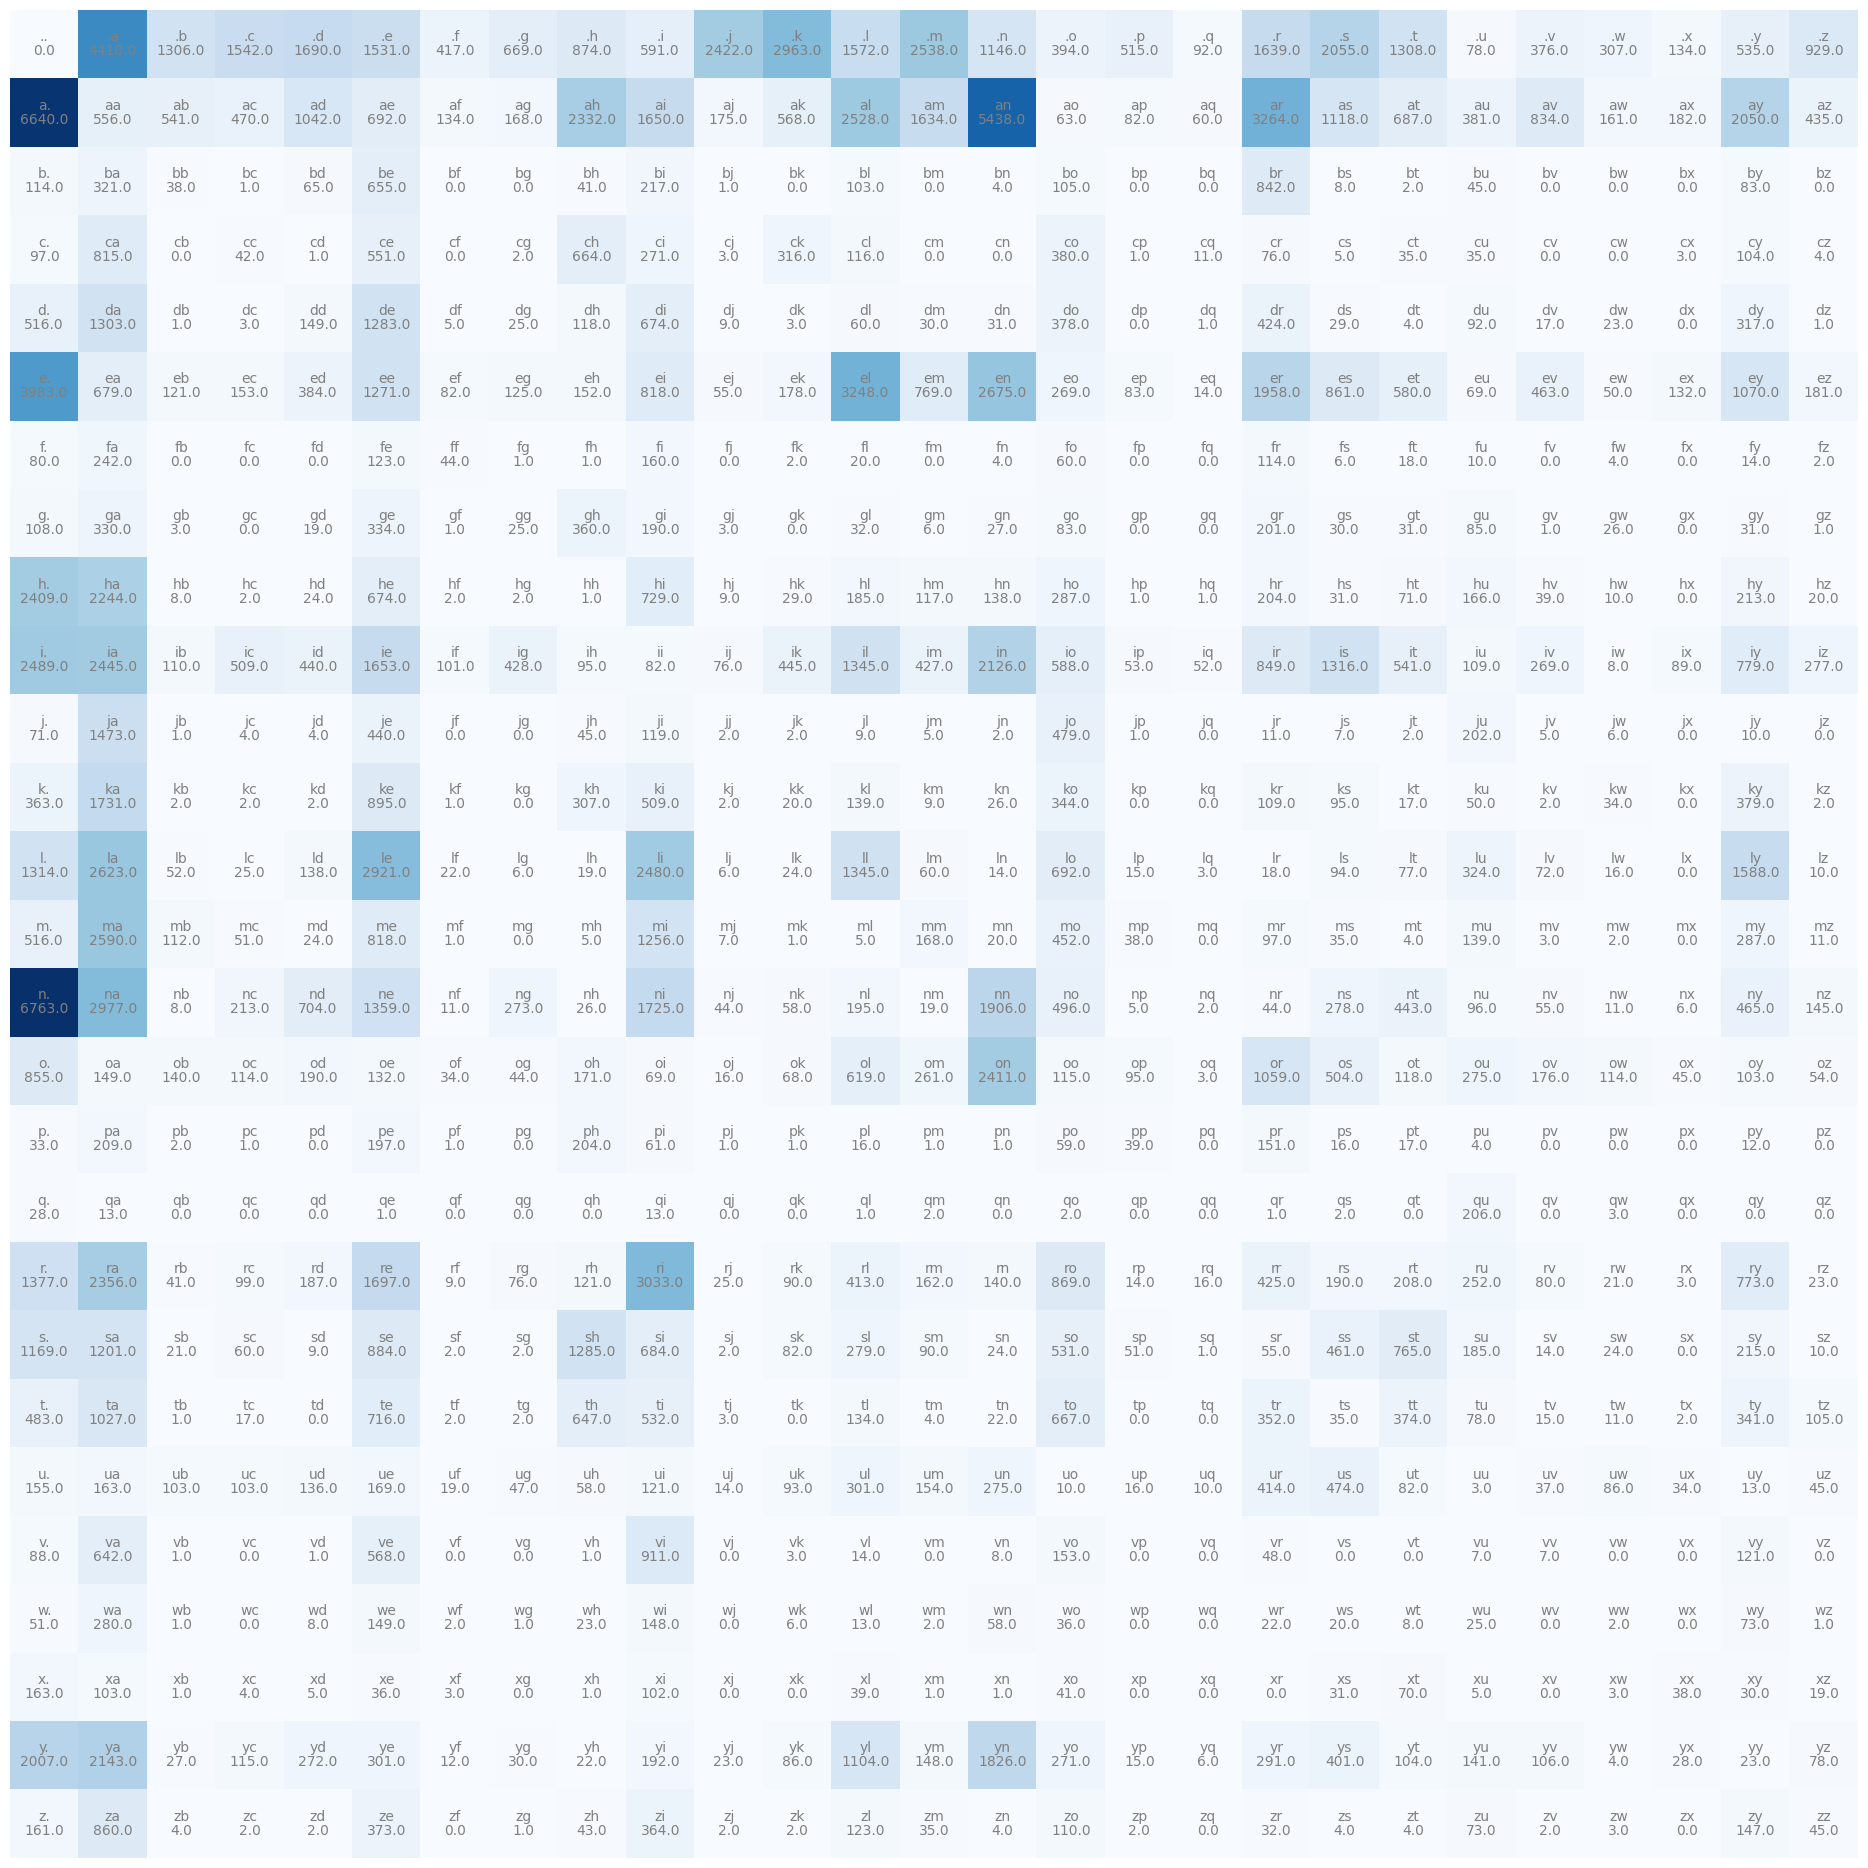

In [14]:
atoi = {c: i for i, c in enumerate(alphabet)}
N = torch.zeros([len(alphabet),len(alphabet)])
for ((b, c),d) in bigrams:
    N[atoi[b],atoi[c]] = int(d)
plt.figure(figsize=(24,24))
plt.imshow(N,cmap='Blues')
for i in range(len(alphabet)):
    for j in range(len(alphabet)):
        chstr = alphabet[i] + alphabet[j]
        plt.text(j,i, chstr, ha='center', va="bottom", color='gray')
        plt.text(j,i, N[i, j].item(), ha='center', va="top", color='gray')
plt.axis('off')

In [17]:
print(N[0].shape)
p = N[0] / N[0].sum()
p

torch.Size([27])


tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [20]:
g = torch.Generator().manual_seed(1232312)
p  = torch.rand(3, generator=g)

p = p /p.sum()
p

tensor([0.3440, 0.3920, 0.2641])

In [23]:
g = torch.Generator().manual_seed(1232312)
torch.multinomial(p, num_samples= 20 , replacement =True, generator = g)

tensor([2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 0])

In [58]:
def sample_name():
    out = [] 
    ix = 0 
    while True:
        p = N[ix].float()
        p = p/p.sum()
        ix = torch.multinomial(p, num_samples= 1 , replacement =True, generator = g).item()
        if ix == 0:
            break
        out.append(alphabet[ix])
    return (''.join(out))

print(*(sample_name() for _ in range(10)))

m l ysh riah atnaujokharif eyauhynaitynde dyday kananbash zalalina kom
